# Intermediate Macroeconomics - Labour market effects

In this assignment, we consider the classical model of the labour market as we discussed in chapter 6 of the book.

We first import some libraries.

In [17]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

# The production function

In the first tutorial, exercise 2, you worked with the Cobb Douglas production function. In Python, this function can be written as:

In [2]:
def production_function(K,L,gamma):
    return A*K**gamma*L**(1-gamma)

However, in this assignment, we use a standard CES production function:

$$
Y = (\alpha K^\gamma + (1-\alpha) L^\gamma)^{1/\gamma}
$$

where $\gamma$ ≤1. When using this function, the substitution elasticity between capital and labour is equal to 1/(1-$\gamma$), so the higher $\gamma$ is, the more labour and capital can be substituted for each other.



** Exercise**

Define again the function `production_function(K,L,gamma)` but now for the CES case:


In [214]:
def production_function(K,L,gamma):
    return (alpha*K**gamma + (1-alpha)*L**gamma)**(1/gamma)

From this production function we derive labour demand with parameter values $\alpha =0.25, \beta =0.5, K=1$.


In [215]:
alpha = 0.25
beta = 0.5
K = 1


def labour_demand(gamma,real_wage):
    labour =  optimize.fminbound(lambda l: -(production_function(K,l,gamma)-real_wage*l),0,100,full_output=1)
    return labour[0]



** Exercise** 

Give the Python code for the labour supply function as it was specified in the tutorial exercise:

In [216]:
def labour_supply(real_wage):
    return real_wage**beta

** Exercise**

Complete the code cell below to plot labour demand and labour supply as a function of the real wage $W/P$, assuming $\gamma$ has the value -10. Make sure that you specify $W/P$ as label on the y-axis and $L$ as label on the x-axis.



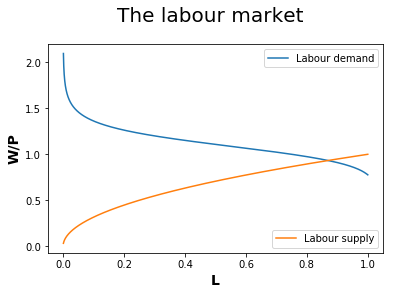

In [223]:
gamma = -10

range_realwage = arange(0.001,1.0,0.0001)
range_demand = array([labour_demand(gamma, real_wage) for real_wage in range_realwage])
range_supply = array([labour_supply(real_wage) for real_wage in range_realwage])

fig = plt.figure()
fig.suptitle('The labour market', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('L', fontweight='bold', fontsize=14)
ax.set_ylabel('W/P', fontweight='bold', fontsize=14)

line1, = plt.plot(range_realwage, range_demand, label="Labour demand")
line2, = plt.plot(range_realwage, range_supply, label="Labour supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

plt.show()

We can solve for the equilibrium value.



In [153]:
initial_guess = 0.8
optimize.fsolve(lambda w: labour_demand(gamma,w)-labour_supply(w), initial_guess)

array([ 0.86949312])

**Additional explanation**: This means that, given all values ($\alpha = 0.25$, $\beta = 0.5$, $K = 1$, and $\gamma = -10$), that the labour market clears at a level $L^*$ which is equal to, approximately, $0.87$.

** Exercise **

Calculate equilibrium output $Y$.

In [155]:
production_function(1,0.86949312,-10)

0.8878184988829255

**Additional explanation**: Therefore, given $L^*$, the equilibrium output $Y^*$ is, approximately, $0.89$. 

# The AS-curve

Assume that the nominal wage $W$ is fixed at the level 0.01. We would like to plot the aggregate supply curve, that is: output $Y$ as a function of $P$.

In [224]:
W = 0.01

def labour_out_of_equilibrium(P,gamma):
    l = min(labour_demand(gamma,W/P), labour_supply(W/P))
    return l

---

**Exercise**

1.  Explain the code above.
  + $W = 0.01$ indicates that the real wage ($W/P$) is equal to $0.01$.
  + The "def labour_out_of_equilibrium ($P$, gamma)" part defines the labour out of equilibrium (in this case, the "oversupply" or "undersupply" of labour).
  + The "l = min (labour_demand(gamma, $W/P$), labour_supply($W/P$))" aims to take the lowest value (hence the min() being used) of either the labour demand or the labour supply, based on the variables gamma and the real wage rate W/P. 
  + Concluding, this formula will give us the difference in terms of $Y$ between the demand curve and supply curve. So, if labour demand is bigger than labour supply, it will show the changes in output $Y$ because of the oversupply of labour. Similarly, if labour supply is bigger than labour demand, it will show the changes in output $Y$ because of the undersupply of labour. 
  
2. Plot output $Y$ as a function of $P$.  
Look at the graph and the accompanying code below.

---

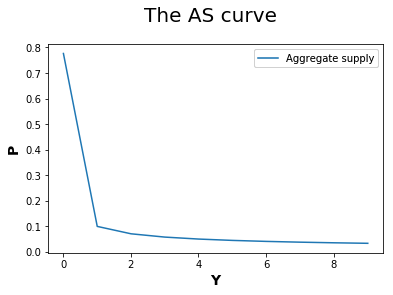

In [225]:
range_P = arange(0.01,10,1)
range_labour = array([labour_out_of_equilibrium(P, gamma) for P in range_P])

fig = plt.figure()
fig.suptitle('The AS curve', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Y', fontweight='bold', fontsize=14)
ax.set_ylabel('P', fontweight='bold', fontsize=14)

line1, = plt.plot(range_P, range_labour, label="Aggregate supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)

plt.show()

# Taxation

In this framework, we can introduce taxation as we also did in the tutorial exercise. With a social security tax $t_{worker}$, labour demand gets a different form.


** Exercise**

Adjust the code above by including a social security tax.

In [226]:
def labour_demand(gamma,real_wage,t_worker):
    labour =  optimize.fminbound(lambda l: -(production_function(K,l,gamma)-real_wage*(1+t_worker)*l),0,100,full_output=1)
    return labour[0]

---

**Exercise**

1.  Calculate the equilibrium employment and output levels for `t_worker = 0` and `t_worker = 0.2` at $\gamma = -10$.
2.  Do the same for $\gamma = -1$ and discuss the difference with the case of $\gamma = -10$.

---


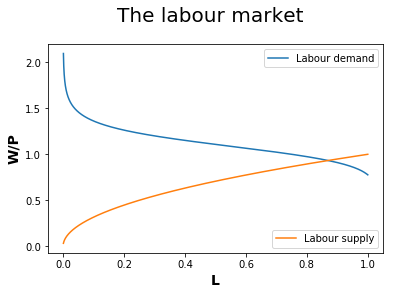

In [229]:
t_worker = 0

range_realwage = arange(0.001,1.0,0.0001)
range_demand = array([labour_demand(gamma, real_wage, t_worker) for real_wage in range_realwage])
range_supply = array([labour_supply(real_wage) for real_wage in range_realwage])

fig = plt.figure()
fig.suptitle('The labour market', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('L', fontweight='bold', fontsize=14)
ax.set_ylabel('W/P', fontweight='bold', fontsize=14)

line1, = plt.plot(range_realwage, range_demand, label="Labour demand")
line2, = plt.plot(range_realwage, range_supply, label="Labour supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

plt.show()

In [180]:
initial_guess = 0.8
optimize.fsolve(lambda w: labour_demand(gamma,w,t_worker)-labour_supply(w), initial_guess)

array([ 0.86949312])

In [181]:
production_function(1,0.86949312,-10)

0.8878184988829255

**Question 1, with $t_{worker} = 0$:**  
Obviously, with all values the same and $t_{worker} = 0$, we still have the same equilibrium employment level $L ≈ 0.87$, and the output level $Y ≈ 0.89$

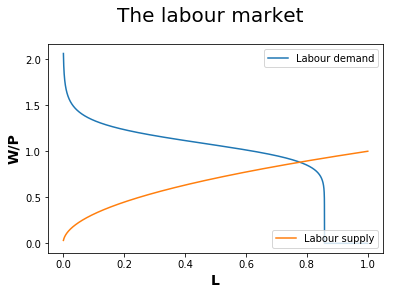

In [230]:
t_worker = 0.2

range_realwage = arange(0.001,1.0,0.0001)
range_demand = array([labour_demand(gamma, real_wage, t_worker) for real_wage in range_realwage])
range_supply = array([labour_supply(real_wage) for real_wage in range_realwage])

fig = plt.figure()
fig.suptitle('The labour market', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('L', fontweight='bold', fontsize=14)
ax.set_ylabel('W/P', fontweight='bold', fontsize=14)

line1, = plt.plot(range_realwage, range_demand, label="Labour demand")
line2, = plt.plot(range_realwage, range_supply, label="Labour supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

plt.show()

In [183]:
initial_guess = 0.8
optimize.fsolve(lambda w: labour_demand(gamma,w,t_worker)-labour_supply(w), initial_guess)

array([ 0.77675346])

In [184]:
production_function(1,0.77675346,-10)

0.7973239212276428

**Question 1, with $t_{worker} = 0.2$**:  
Now, both the equilibrium employment level ($L ≈ 0.77$) and the output level ($Y ≈ 0.80$) have fallen. Because of the higher social security tax rate, workers are less willing to supply labour at each wage rate, as they end up with less  money in the end. This makes labour more costly for firms, which therefore sees output decrease as well.

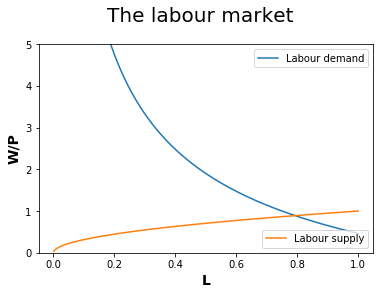

In [233]:
t_worker = 0
gamma = -1

range_realwage = arange(0.001,1.0,0.0001)
range_demand = array([labour_demand(gamma, real_wage, t_worker) for real_wage in range_realwage])
range_supply = array([labour_supply(real_wage) for real_wage in range_realwage])

fig = plt.figure()
fig.suptitle('The labour market', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('L', fontweight='bold', fontsize=14)
ax.set_ylabel('W/P', fontweight='bold', fontsize=14)

axes = plt.gca()
axes.set_ylim([0,5])

line1, = plt.plot(range_realwage, range_demand, label="Labour demand")
line2, = plt.plot(range_realwage, range_supply, label="Labour supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

plt.show()

In [186]:
initial_guess = 0.8
optimize.fsolve(lambda w: labour_demand(gamma,w,t_worker)-labour_supply(w), initial_guess)

array([ 0.79284558])

In [187]:
production_function(1,0.79284558,-1)

0.8361485468121801

**Question 2 with $t_{worker} = 0$ and $\gamma = -1$**:  
Now, equilibrium employment is lower ($L ≈ 0.79$) with $\gamma = -1$, compared to when $\gamma = -10$. Income has decreased too ($Y ≈ 0.83$).

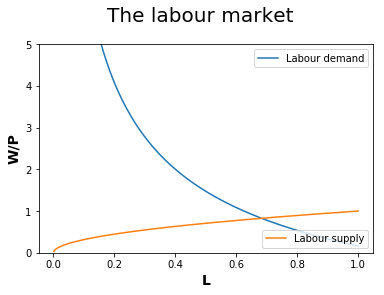

In [236]:
t_worker = 0.2
gamma = -1

range_realwage = arange(0.001,1.0,0.0001)
range_demand = array([labour_demand(gamma, real_wage, t_worker) for real_wage in range_realwage])
range_supply = array([labour_supply(real_wage) for real_wage in range_realwage])

fig = plt.figure()
fig.suptitle('The labour market', fontsize=20, fontweight='light')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('L', fontweight='bold', fontsize=14)
ax.set_ylabel('W/P', fontweight='bold', fontsize=14)

axes = plt.gca()
axes.set_ylim([0,5])

line1, = plt.plot(range_realwage, range_demand, label="Labour demand")
line2, = plt.plot(range_realwage, range_supply, label="Labour supply")

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)

plt.show()

In [193]:
initial_guess = 0.7
optimize.fsolve(lambda w: labour_demand(gamma,w,t_worker)-labour_supply(w), initial_guess)

array([ 0.68298695])

In [194]:
production_function(1,0.68298695,-1)

0.7417750421298668

**Question 2 with $t_{worker} = 0.2$ and $\gamma = -1$**:  
Equilibrium employment has decreased ($L ≈ 0.68$) with $\gamma = -1$ and $t_{worker} = 0.2$, compared to when $\gamma = -10$. Income has decreased too ($Y ≈ 0.74$).

Concluding, we see that the higher $t_{worker}$ is, the lower equilibrium employment and therefore total income is. This is logical, as explained before: Because of the higher social security tax rate, workers are less willing to supply labour at each wage rate, as they end up with less money in the end. This makes labour more costly for firms, which therefore sees output decrease as well.  
Yet, we also notice that the higher $\gamma$ is, the lower equilibrium employment and therefore total income is. We have learned that $\gamma$ tells us something about the stickiness of prices. The higher $\gamma$, the less sticky prices become. This means that prices will deviate sooner, and pressure on wage contracts with pre-determined wage rates increases. The higher $\gamma$ also makes for a steeper $AS$ curve, making total income $Y$ more "vulnerable" for sudden changes in the employment level $L$.